Found 9144 images belonging to 1 classes.
Epoch 1/5


C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(64, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 18s 18s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 14s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 14s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 14s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


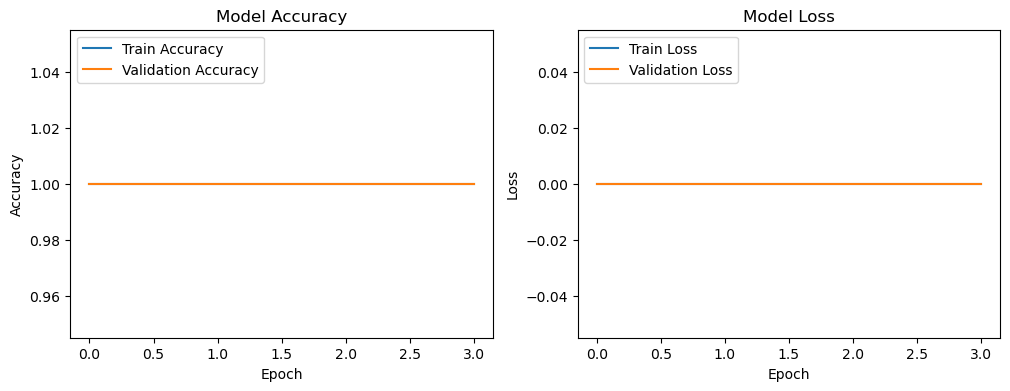

Epoch 1/5
1/1 [==============================] - 22s 22s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 17s 17s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 17s 17s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 945ms/step


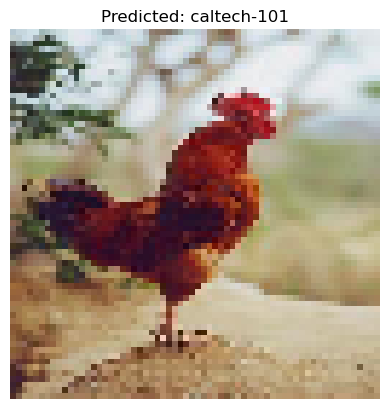

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define directory for the dataset
dataset_dir = r"C:\Users\ADMIN\Downloads\archive (6)"  # Use raw string

# Preprocessing image data
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Set batch size
batch_size = 64  # Reduced batch size

# Load dataset from directory
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load first batch as training and second as testing data
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze lower layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(dataset_generator.class_indices), activation='softmax')(x)  # Use the number of classes

# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model and store history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Fine-tune hyperparameters and unfreeze more layers if necessary
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Update the classifier
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(len(dataset_generator.class_indices), activation='softmax')(x)

# Create and compile the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the fine-tuned model with early stopping
history_fine_tune = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Load and preprocess an external image for prediction
image_path = r'C:\Users\ADMIN\Downloads\archive (6)\caltech-101\rooster\image_0018.jpg'  # Replace with the actual image path
img = load_img(image_path, target_size=(64, 64))  # Resize to match model input
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
predicted_value = model.predict(img_array)
labels = list(dataset_generator.class_indices.keys())
predicted_class = labels[np.argmax(predicted_value[0])]

# Visualize the image and the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
